In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

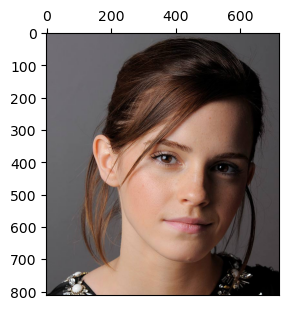

In [2]:
im = cv.imread("a1images/emma.jpg")

fig, ax = plt.subplots(1,1,figsize = (3,4))
ax.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

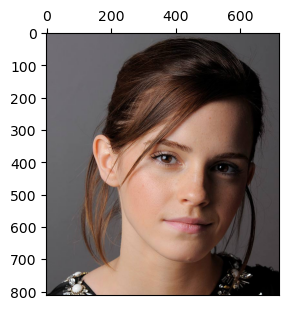

In [3]:
im = plt.imread("a1images/emma.jpg")
fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(im)
ax.xaxis.set_ticks_position('top')
plt.show()

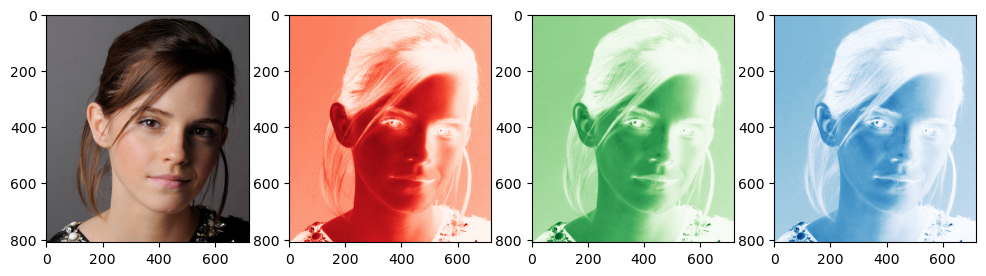

In [4]:
im = plt.imread("a1images/emma.jpg")
fig ,ax = plt.subplots(1,4, figsize = (12,16))

ax[0].imshow(im) 
ax[1].imshow(im[...,0],cmap='Reds')    #red plane only
ax[2].imshow(im[...,1],cmap='Greens')  #green plane only
ax[3].imshow(im[...,2],cmap='Blues')   #blue plane only

#ax.xaxis.set_ticks_position('top')
plt.show()

In [5]:
im.shape

(810, 720, 3)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19784\1100180772.py:7: RuntimeWarning: overflow encountered in scalar add
  val = sum(im[i][j])/3


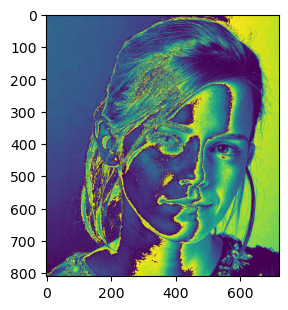

In [6]:
rows , cls , chas = im.shape   #(810, 720, 3)

gray_im = np.zeros((rows,cls))

for i in range(rows):
    for j in range(cls):
        val = sum(im[i][j])/3
        gray_im[i][j] = val

fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(gray_im)
plt.show()

## Question 1

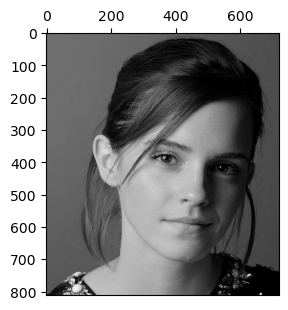

In [7]:
gray_im = np.dot(im,[0.2989, 0.5870, 0.1140])

fig ,ax = plt.subplots(1,1, figsize = (3,4))
ax.imshow(gray_im,cmap = 'gray')
ax.xaxis.set_ticks_position('top')
plt.show()

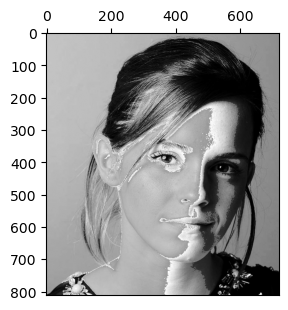

In [8]:
def f(x):
    return np.where(
        (x >= 50) & (x < 150),
        1.55 * x + 22.5,
        x
    ).astype(np.uint8)


    
new_im_1 = f(gray_im)

fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(new_im_1,cmap = 'gray')
ax.xaxis.set_ticks_position('top')
plt.show()

In [9]:
im = cv.imread('a1images/emma.jpg')
gray_im = cv.cvtColor(im,cv.COLOR_BGR2GRAY)

"""
cv.imshow(" " , gray_im)
cv.waitKey(0)
cv.destroyAllWindows()
"""

'\ncv.imshow(" " , gray_im)\ncv.waitKey(0)\ncv.destroyAllWindows()\n'

In [13]:
#with mask and lut

r = np.arange(256)
s = np.zeros(256)

#function
slope = (255-100)/(150-50)
c = 100 - slope * 50

mask = (r>=50) & (r<150)
s[mask] = slope * r[mask] + c


m1 = r<50
s[m1] = r[m1]

m2 = r>=150
s[m2] = r[m2]

lut = np.clip(np.round(s),0,255).astype(np.uint8)

transformed = cv.LUT(gray_im,lut)

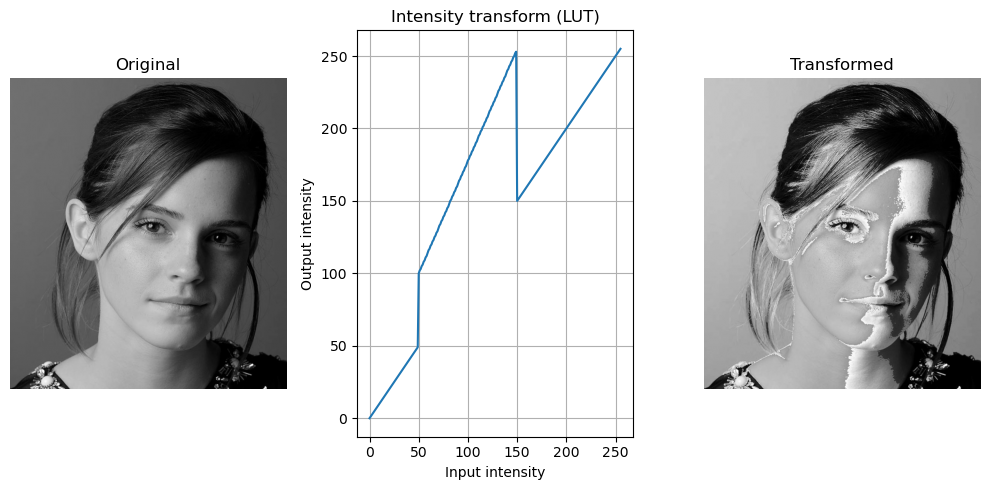

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(gray_im, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.plot(lut)
plt.title('Intensity transform (LUT)')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.grid(True)

plt.subplot(1,3,3)
plt.imshow(transformed, cmap='gray')
plt.title('Transformed')
plt.axis('off')

plt.tight_layout()
plt.show()



## Question 2

In [6]:
im = cv.imread("a1images/brain_proton_density_slice.png")
gray_im = cv.cvtColor(im,cv.COLOR_BGR2GRAY)


"""
cv.imshow(" " , gray_im)
cv.waitKey(0)
cv.destroyAllWindows()
"""

'\ncv.imshow(" " , gray_im)\ncv.waitKey(0)\ncv.destroyAllWindows()\n'

### part a : white matter

In [15]:
r = np.arange(256)
s = np.zeros_like(r)



m1 = r<120
s[m1] = 0.8 * r[m1]

m2 = (120<=r) & (r<256)
s[m2] = 1.5*r[m2] - 80


m3 = r>=230
s[m3] = 255 - 0.5 * (255 - r[m3]) 


lut = np.clip(np.round(s),0,255).astype(np.uint8)

transformed = cv.LUT(gray_im,lut)

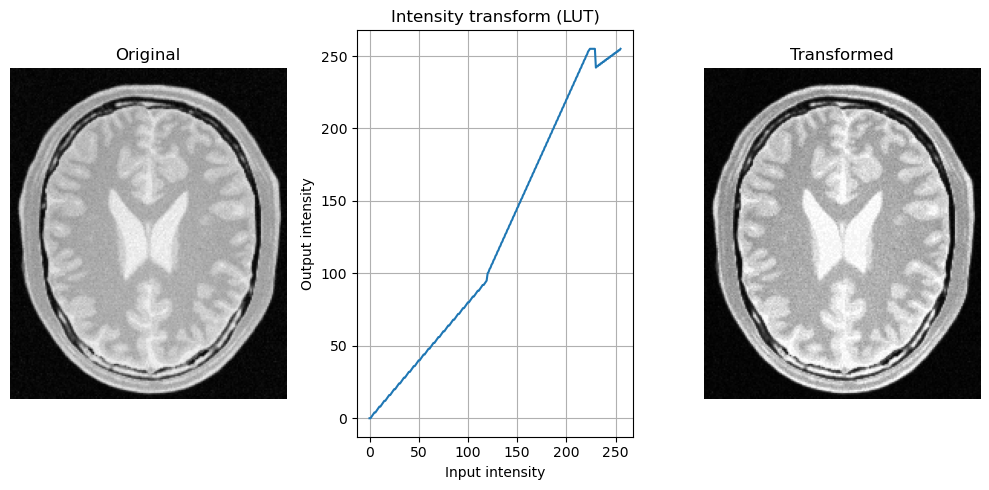

In [16]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(gray_im, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.plot(lut)
plt.title('Intensity transform (LUT)')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.grid(True)

plt.subplot(1,3,3)
plt.imshow(transformed, cmap='gray')
plt.title('Transformed')
plt.axis('off')

plt.tight_layout()
plt.show()



### part b : gray matter 

In [18]:
r = np.arange(256)
s = np.zeros_like(r)


m1 = r < 70
s[m1] = 0.6 * r[m1]

m2 = (r >= 70) & (r <= 130)
s[m2] = 80 + 2 * (r[m2] - 70)  

m3 = r > 130
s[m3] = 0.7 * r[m3]

lut = np.clip(np.round(s),0,255).astype(np.uint8)
transformed = cv.LUT(gray_im,lut)

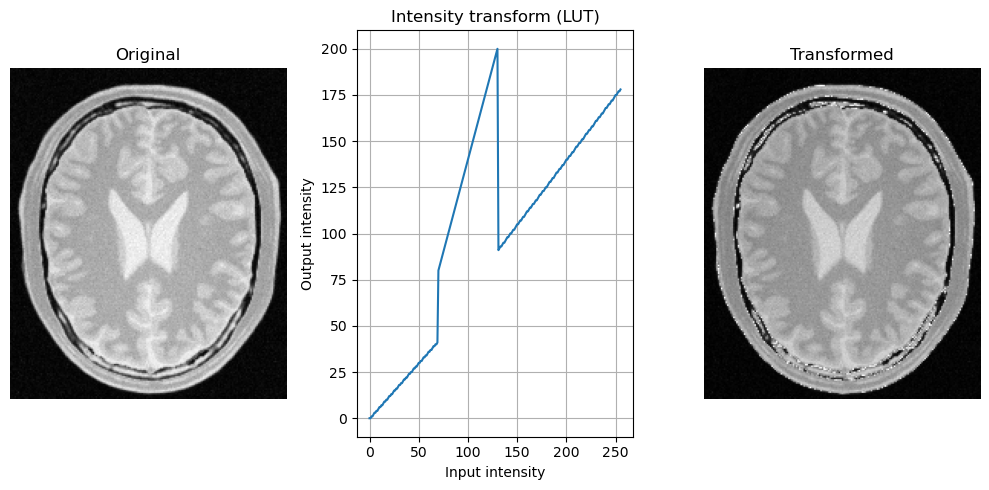

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(gray_im, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.plot(lut)
plt.title('Intensity transform (LUT)')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.grid(True)

plt.subplot(1,3,3)
plt.imshow(transformed, cmap='gray')
plt.title('Transformed')
plt.axis('off')

plt.tight_layout()
plt.show()



## Gamma Correction

---

### 1. What is Gamma?

- **Gamma** controls brightness in a *non-linear* way (not just brighter or darker).
- Human eyes see brightness **logarithmically** (we notice shadows and midtones more than extreme blacks or whites).
- **Digital screens** store and display images in a *gamma-encoded* way so they look correct to us.

---

### 2. Why We Need Gamma Correction

- Cameras capture light **linearly** (real-world brightness is proportional to light intensity).
- If we showed this linear data directly, the image would look **too dark**.
- **Gamma correction** brightens midtones without overexposing highlights or losing shadow detail.

---

### 3. Two Main Uses

1. **Encoding (Gamma Encoding)** — applied when saving an image, so it looks correct on screens.  
2. **Decoding (Gamma Decoding)** — applied when loading or processing an image, to restore real light values.

---

### 4. The Gamma Formula

- **Encoding:**  

$$
\text{encoded} = \text{real}^{\frac{1}{\gamma}}
$$

- **Decoding:**  

$$
\text{real} = \text{encoded}^{\gamma}
$$

- For most displays, **γ ≈ 2.2**.

---

### 5. Practical Example

- Suppose a pixel’s real light value is **0.5** (50% brightness).
- With γ=2.2 encoding:  

$$
0.5^{\frac{1}{2.2}} \approx 0.73
$$

- Stored pixel value looks brighter on screen.

---

### 6. Key Points to Remember

- Gamma is **not** just a brightness slider — it changes *tone mapping* especially in midtones.
- **Linear space** = good for math & image processing.  
  **Gamma space** = good for viewing on screens.
- Always **convert to linear** before blending, resizing, or doing lighting math in graphics.

---

### 7. Real-World Connections

- **Photography** → RAW files are linear, JPEG is gamma-encoded.
- **Video** → Uses gamma curves like Rec.709 or sRGB.
- **Games / 3D graphics** → Lighting calculated in linear space, then gamma-encoded.

---

### 8. Mental Model

Think of gamma like **stretching** and **compressing** the brightness scale:

- γ > 1 → Midtones are brighter (common in displays).
- γ < 1 → Midtones are darker.
